# SENTIMENT ANALYSIS

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb

## Load Dataset

In [4]:
dataframe = pd.read_csv('data.csv')


In [5]:
dataframe.head()

,Condition,Text
0,Anxiety,oh my gosh
1,Anxiety,"trouble sleeping, confused mind, restless hear..."
2,Anxiety,"All wrong, back off dear, forward doubt. Stay ..."
3,Anxiety,I've shifted my focus to something else but I'...
4,Anxiety,"I'm restless and restless, it's been a month n..."


In [6]:
dataframe['Condition'].value_counts()

Condition
Normal                  16351
Depression              15405
Suicidal                10655
Anxiety                  3890
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64

<Axes: xlabel='Condition', ylabel='count'>

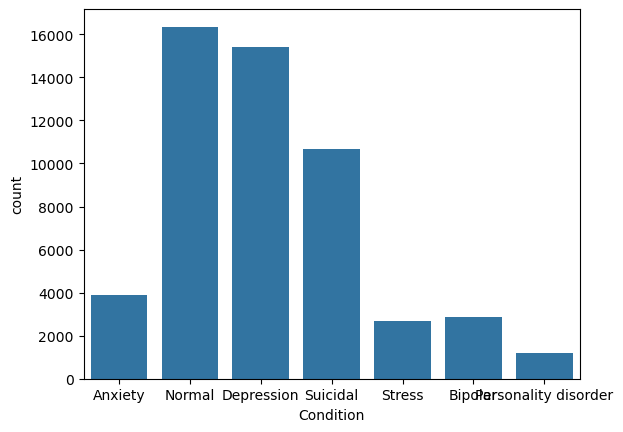

In [7]:
sb.countplot(x='Condition',data=dataframe)

### DATA PRE-PROCESSING

In [9]:
import neattext.functions as nfx
#converting Text data into string.
#dataframe['Text'] = str(dataframe['Text'])
#removing user handles.
dataframe['Clean_Text'] = dataframe['Text'].astype(str).apply(nfx.remove_userhandles)

In [10]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [11]:
dataframe['Clean_Text'] = dataframe['Text'].astype(str).apply(nfx.remove_stopwords)

In [12]:
dataframe

,Condition,Text,Clean_Text
0,Anxiety,oh my gosh,oh gosh
1,Anxiety,"trouble sleeping, confused mind, restless hear...","trouble sleeping, confused mind, restless hear..."
2,Anxiety,"All wrong, back off dear, forward doubt. Stay ...","wrong, dear, forward doubt. Stay restless rest..."
3,Anxiety,I've shifted my focus to something else but I'...,I've shifted focus I'm worried
4,Anxiety,"I'm restless and restless, it's been a month n...","I'm restless restless, month now, boy. mean?"
...,...,...,...
53045,Suicidal,I'm not gonna live anymore,I'm gonna live anymore
53046,Anxiety,I'm restless,I'm restless
53047,Anxiety,I can't do anything,can't
53048,Suicidal,I'm gonna die tomorrow,I'm gonna die tomorrow


In [13]:
x = dataframe['Clean_Text']
y = dataframe['Condition']

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=None)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [16]:
x_train = x_train.astype(str)
x_test = x_test.astype(str)
y_train = y_train.astype(str)
y_test = y_test.astype(str)
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(max_iter=10000))])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

0.7468426013195099

pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc', SVC(kernel = 'rbf', C = 10))])
pipe_svm.fit(x_train,y_train)
pipe_svm.score(x_test,y_test)

In [18]:
pipe_rf = Pipeline(steps=[
    ('cv',CountVectorizer()),
    ('rf', RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

0.6556079170593779

In [38]:
import joblib
pipeline_file = open("mental_health_lr.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

import joblib
pipeline_file = open("mental_health_svm.pkl","wb")
joblib.dump(pipe_svm,pipeline_file)
pipeline_file.close()

In [21]:
import joblib
pipeline_file = open("mental_health_rf.pkl","wb")
joblib.dump(pipe_rf,pipeline_file)
pipeline_file.close()